<left><img width=10% src="img/cornell_tech2.svg"></left>

# Lecture 2: Supervised Machine Learning

We saw in the previous lecture that there exist three types of machine learning---supervised, unsupervised, and reinforcement learning. This lecture will focus on supervised learning.

<!-- Supervised learning is by far the most common type of machine learning. This lecture will focus on supervised learning, define precisely what it is, and provide a few examples. -->

We will explain what supervised learning is, and introduce mathematical notation that will be useful throughout the course for defining algorithms.

### What is Supervised Learning?

At a very high level, supervised learning works as follows:

1. First, we collect a dataset of labeled training examples (input-output pairs).
2. We train a model to output accurate predictions on this dataset.
3. When the model sees new, similar data, it will also be accurate.

#### An Example 

Consider an autonomous vehicle that needs to recognize objects on the road: pedestrians, cars, etc.
<center><img width=70% src="img/tesla_data.png"/></center>

One way of building an object detection system would be to specify by hand the properties defining each object: e.g., a car has four wheels, has windows, etc. However this approach does not scale: we can't handle all the edge cases well.

Instead, we can apply supervised learning: we collect a large dataset of cars and provide them as exmaples to a supervised learning algorithm. The algorithm then automatically learns what features define a car! 

This approach vastly outperforms human programmers trying to write rules by hand, and is currently the only viable way to program object detection systems.

# 2.1. Elements of A Supervised Machine Learning Problem


Next, let's define supervised learning more precisely. To make things concerete, we will use a simple running example---predicting the diabetes risk of a patient from their BMI.

### Three Components of Supervised Machine Learning

It is useful to think of supervised learning as involving three key elements: a dataset, a learning algorithm, and a predictive model.

To apply supervised learning, we define a dataset and a learning algorithm.

$$ \text{Dataset} + \text{Learning Algorithm} \to \text{Predictive Model} $$

The output is a predictive model that maps inputs to targets. For instance, it can predict targets on new inputs.

We will now dissect and give examples of each of these three elements.

## 2.1.1. A Supervised Learning Dataset

Let’s start with a simple example of a supervised learning problem: predicting diabetes risk.

We start with a dataset of diabetes patients. 

* For each patient we have a access to their BMI and an estimate of diabetes risk (from 0-400).
* We are interested in understanding how BMI affects an individual's diabetes risk.

We are going to load a real diabetes dataset from `scikit-learn`, a popular machine learning libraries that we will use throughout the course.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

# We will use the UCI Diabetes Dataset
# It's a toy dataset often used to demo ML algorithms.
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# Use only the BMI feature
diabetes_X = diabetes_X.loc[:, ['bmi']]

# The BMI is zero-centered and normalized; we recenter it for ease of presentation
diabetes_X = diabetes_X * 30 + 25

# Collect 20 data points
diabetes_X_train = diabetes_X.iloc[-20:]
diabetes_y_train = diabetes_y.iloc[-20:]

# Display some of the data points
pd.concat([diabetes_X_train, diabetes_y_train], axis=1).head()

,bmi,target
422,27.335902,233.0
423,23.811456,91.0
424,25.331171,111.0
425,23.779122,152.0
426,23.973128,120.0


We can also visualize this two-dimensional dataset.

Text(0, 0.5, 'Diabetes Risk')

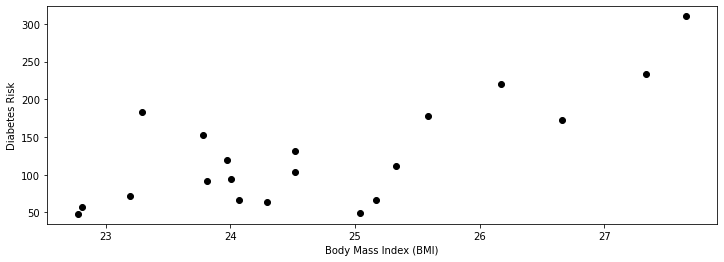

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

plt.scatter(diabetes_X_train, diabetes_y_train,  color='black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

We see from the above simple visualization that the the diabetes risk increases with the patient's BMI.

## 2.1.2. A Supervised Learning Algorithm

Next, suppose we wanted to predict the risk of a new patient given their BMI. We will use supervised learning for this. We already have a dataset of (BMI, risk) pairs---now we will give an exmaple of a supervised learning algorithm that learns the relationship between BMI and risk from this data.

Again, it will be useful to think about a supervised learning algorithm as having two components: a model class and an optimizer.

### 2.1.2.1. The Model Class

Intuitively, the model class represents the set of possible relationships between BMI and risk that we believe to be true. In practice, we can't search the space of all possible mappings between BMI and risk (we will see later several reasons for why that's the case). Therefore, we have to choose a set of possible mappings, and then choose the one we think is the best in this class.

Let's assume for this example that risk is a linear function of BMI. In other words, for some unknown $\theta_0, \theta_1 \in \mathbb{R}$, we have
$$ y = \theta_1 \cdot x + \theta_0, $$
where $x$ is the BMI (also called the independent variable), and $y$ is the diabetes risk score (the dependent variable). 

The parameters $\theta_1, \theta_0$ are the slope and the intercept of the line relates $x$ to $y$.

We can visualize this for a few values of $\theta_1, \theta_0$.

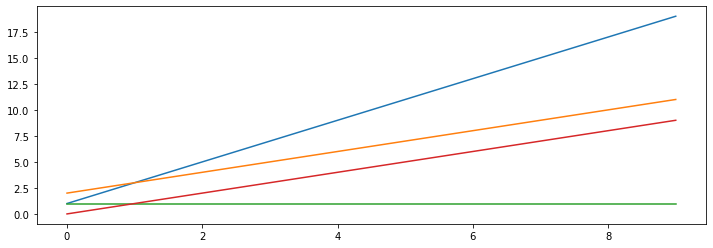

In [3]:
theta_list = [(1, 2), (2,1), (1,0), (0,1)]
for theta0, theta1 in theta_list:
    x = np.arange(10)
    y = theta1 * x + theta0
    plt.plot(x,y)

Our supervised learning algorithm will attempt to choose the linear relationship fits well the training data that we have.

### 2.1.2.2. The Optimizer

Given our assumption that $x,y$ follow the a linear relationship, the goal of a supervised learning algorithm is to find a good set of parameters consistent with the data.

This is an optimization problem---we want to maximize the fit between the model and the data over the space of all possible models. The component of a supervised learning algorithm that performs this search procedure is called the optimizer.

We will soon dive deeper into optimization algorithms for machine learning, but for now, let's call the `sklearn.linear_model` library to find a $\theta_1, \theta_0$ that fit the data well.

In [4]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train.values)

# Make predictions on the training set
diabetes_y_train_pred = regr.predict(diabetes_X_train)

# The coefficients
print('Slope (theta1): \t', regr.coef_[0])
print('Intercept (theta0): \t', regr.intercept_)

Slope (theta1): 	 37.378842160517664
Intercept (theta0): 	 -797.0817390342369


Here, we used `scikit-learn` to find the best slope and intercept to the above dataset.

## 2.1.3. A Supervised Learning Model

The supervised learning algorithm gave us a pair of parameters $\theta_1^*, \theta_0^*$. These define the *predictive model* $f^*$, defined as
$$ f(x) = \theta_1^* \cdot x + \theta_0^*, $$
where again $x$ is the BMI, and $y$ is the diabetes risk score.

We can visualize the linear model that best fits our data.

InvalidIndexError: (slice(None, None, None), None)

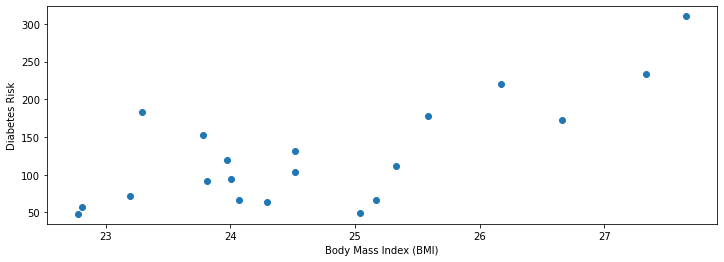

In [5]:
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.plot(diabetes_X_train, diabetes_y_train_pred, color='black', linewidth=2)

Our visualization seems reasonable: we see that the linear model that we found is close to the observed data and captures the trend we noticed earlier---higher BMI are associated with higher diabetes risk.

## 2.1.4. Making New Predictions

Recall that one of the goals of supervised learning is to predict the diabetes of new patients.

Given a new dataset of patients with a known BMI, we can use the model that we have just found to estimate their  risk.

Formally, given an $x_\text{new}$, we can output prediction $y_\text{new}$ as
$$ y_\text{new} = f(x_\text{new}) = \theta_1^* \cdot x_\text{new} + \theta_0. $$

Let's illustrate this equation with a specific example from our diabetes dataset. 

First, we start by loading more data. We will load three new patients (shown in red below) that we haven't seen before.

In [ ]:
# Collect 3 data points
diabetes_X_test = diabetes_X.iloc[:3]
diabetes_y_test = diabetes_y.iloc[:3]

plt.scatter(diabetes_X_train, diabetes_y_train)
plt.scatter(diabetes_X_test, diabetes_y_test,  color='red')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.legend(['Initial patients', 'New patients'])

Our linear model provides an estimate of the diabetes risk for these patients.

In [ ]:
# generate predictions on the new patients
diabetes_y_test_pred = regr.predict(diabetes_X_test)

# visualize the results
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.scatter(diabetes_X_test, diabetes_y_test, color='red', marker='o')
plt.plot(diabetes_X_train, diabetes_y_train_pred, color='black', linewidth=1)
plt.plot(diabetes_X_test, diabetes_y_test_pred, 'x', color='red', mew=3, markersize=8)
plt.legend(['Model', 'Prediction', 'Initial patients', 'New patients'])

For each patient, we look up their BMI $x$ and compute the value $f(x)$ of the linear model $f$ at $x$. On the above figure, $f(x)$ is denoted by a red cross.

We can compare the predicted value of $f(x)$ to the known true risk $y$ (which the model didn't see, and which is denoted by a red circle). The model is especially accurate on the leftmost patient: the prediction $f(x)$ and the true $y$ almost overlap. The model is somewhat off on the other two points---however, it still correctly identifies them as being at a higher risk.

## 2.1.3 Why Supervised Learning?

We have just seen a simple example of a supervised learning algorithm. Again, we want to emphasize that supervised learning is a powerful tool that can solve many important problems, such as:

* Making predictions on new data. Here, we just gave a very simple example of this use case. However, you can imagine using much more data to characterize a patient: their age, gender, historical blood pressure, medical notes, etc. Supervised learning is extremely powerful, and can often outperform humans at prediction if given enough data.
* Understanding the mechanisms through which input variables affect targets. Instead of using the predictions from the model, we may investigate the model itself. In the above example, we inspected the slope of the model, and noted that it was positive. Thus, we have inferred from data that a high BMI tends to increase diabetes risk.

### 2.1.3.1. Applications of Supervised Learning

More generally, supervised learning finds applications in many areas. In fact, many of the most important applications of machine learning are supervised:

* Classifying medical images. Similarly to how we predicted risk of BMI we may, for example, predict the severity of a cancer tumor from its image.
* Translating between pairs of languages. Most machine translation systems these days are created by training a supervised learning model on large datasets consisting of pairs of sentences in different languages.
* Detecting objects in a self-driving car. Again, we can explain to an algorithm what defines a car by providing many examples of cars. This enables the algorithm to detect new cars.

We will see many more examples in this course.

# 2.2. Anatomy of a Supervised Learning Problem: The Dataset

We have seen an example of supervised machine learning.

Let's now examine more closely the components of a supervised learning problem, starting with the dataset.

#### Recall: Three Components of a Supervised Machine Learning Problem

To apply supervised learning, we define a dataset and a learning algorithm.

$$ \text{Dataset} + \text{Learning Algorithm} \to \text{Predictive Model} $$

The output is a predictive model that maps inputs to targets. For instance, it can predict targets on new inputs.

## 2.2.1. What is a Supervised Learning Dataset?

Let's dive deeper into what's a supervised learning dataset. 

We will again use the UCI Diabetes Dataset as our example.

The UCI dataset contains many additional data columns besides `bmi`, including age, sex, and blood pressure. We can ask `sklearn` to give us more information about this dataset.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
from sklearn import datasets

# Load the diabetes dataset
diabetes = datasets.load_diabetes(as_frame=True)
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## 2.2.2. A Supervised Learning Dataset: Notation

We say that a training dataset of size $n$ (e.g., $n$ patients) is a set
$$\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$$

Each $x^{(i)}$ denotes an input (e.g., the measurements for patient $i$), and each $y^{(i)} \in \mathcal{Y}$ is a target (e.g., the diabetes risk). You may think of $x^{(i)}$ as a column vector containing numbers useful for predicting $y^{(i)}$.

Together, $(x^{(i)}, y^{(i)})$ form a *training example*.

We can look at the diabetes dataset in this form.

In [7]:
# Load the diabetes dataset
diabetes_X, diabetes_y = diabetes.data, diabetes.target

# Print part of the dataset
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In this example, each row $i$ is a vector defining defining $x^{(i)}$. If $x^{(i)}$ is a column vector, each row $i$ is $(x^{(i)})^\top$.

Note that some numbers are unusual (e.g., age is negative). This is because `scikit-learn` normalized this data to have mean zero and standard deviation one.

## 2.2.3. Training Dataset: Inputs

More precisely, an input $x^{(i)} \in \mathcal{X}$ is a $d$-dimensional vector of the form
$$ x^{(i)} = \begin{bmatrix}
x^{(i)}_1 \\
x^{(i)}_2 \\
\vdots \\
x^{(i)}_d
\end{bmatrix}$$
For example, it could be the values of the $d$ features for patient $i$. One of these could be the BMI.

The set $\mathcal{X}$ is called the feature space. Often, we have, $\mathcal{X} = \mathbb{R}^d$.

Let's look at data for one patient. This indeed looks like a column vector.

In [8]:
diabetes_X.iloc[0]

age    0.038076
sex    0.050680
bmi    0.061696
bp     0.021872
s1    -0.044223
s2    -0.034821
s3    -0.043401
s4    -0.002592
s5     0.019908
s6    -0.017646
Name: 0, dtype: float64

### 2.2.3.1. Attributes

We refer to the numerical variables describing the patient as *attributes*. Examples of attributes include:
* The age of a patient.
* The patient's gender.
* The patient's BMI.

Note that thes attributes in the above example have been mean-centered at zero and re-scaled to have a variance of one.

### 2.2.3.1. Features

Often, an input object has many attributes, and we want to use these attributes to define more complex descriptions of the input.

* Is the patient old and a man? (Useful if old men are at risk).
* Is the BMI above the obesity threshold?

We call these custom attributes *features*.

Let's create an "old man" feature.

In [9]:
diabetes_X['old_man'] = (diabetes_X['sex'] > 0) & (diabetes_X['age'] > 0.05)
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,old_man
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,False
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,False
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,True
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,False
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,False


Formally, we may denote features via a function $\phi : \mathcal{X} \to \mathbb{R}^p$ that takes an input $x^{(i)} \in \mathcal{X}$ and outputs a $p$-dimensional vector
$$ \phi(x^{(i)}) = \left[\begin{array}{@{}c@{}}
\phi(x^{(i)})_1 \\
\phi(x^{(i)})_2 \\
\vdots \\
\phi(x^{(i)})_p
\end{array} \right]$$
We say that $\phi(x^{(i)})$ is a *featurized* input, and each $\phi(x^{(i)})_j$ is a *feature*.

#### Features vs Attributes

In practice, the terms attribute and features are often used interchangeably. Most authors refer to $x^{(i)}$ as a vector of features. 

We will follow this convention and use the term "attribute" only when there is ambiguity between features and attributes.

### 2.2.3.3. Features: Discrete vs. Continuous 

Features can be either discrete or continuous. We will see that some ML algorthims handle these differently.

The BMI feature that we have seen earlier is an example of a continuous feature.

We can visualize its distribution.

<AxesSubplot:>

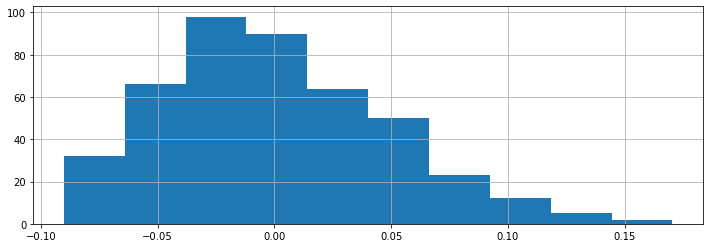

In [10]:
diabetes_X.loc[:, 'bmi'].hist()

Other features take on one of a finite number of discrete values. The `sex` column is an example of a categorical feature.

In this example, the dataset has been pre-processed such that the two values happen to be `0.05068012` and `-0.04464164`.

[ 0.05068012 -0.04464164]


<AxesSubplot:>

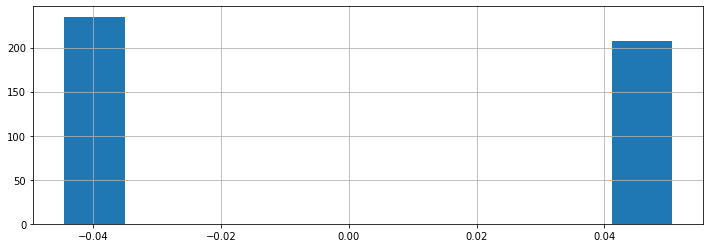

In [11]:
print(diabetes_X.loc[:, 'sex'].unique())
diabetes_X.loc[:, 'sex'].hist()

## 2.3.4. Targets

For each patient, we may be interested in predicting a quantity of interest, the *target*. In our example, this is the patient's diabetes risk.

Formally, when $(x^{(i)}, y^{(i)})$ form a *training example*, each $y^{(i)} \in \mathcal{Y}$ is a target. We call $\mathcal{Y}$ the target space.

We plot the distirbution of risk scores below.

<AxesSubplot:xlabel='Diabetes risk score', ylabel='Number of patients'>

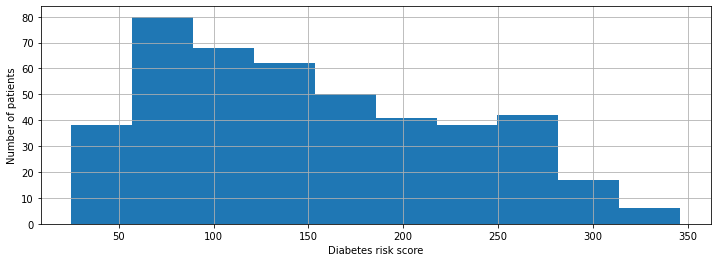

In [12]:
plt.xlabel('Diabetes risk score')
plt.ylabel('Number of patients')
diabetes_y.hist()

### 2.3.4.1. Targets: Regression vs. Classification

We distinguish between two broad types of supervised learning problems that differ in the form of the target variable.

1. __Regression__: The target variable $y$ is continuous. We are fitting a curve in a high-dimensional feature space that approximates the shape of the dataset.
2. __Classification__: The target variable $y$ is discrete. Each discrete value corresponds to a *class* and we are looking for a hyperplane that separates the different classes.

We can easily turn our earlier regression example into classification by discretizing the diabetes risk scores into high or low.

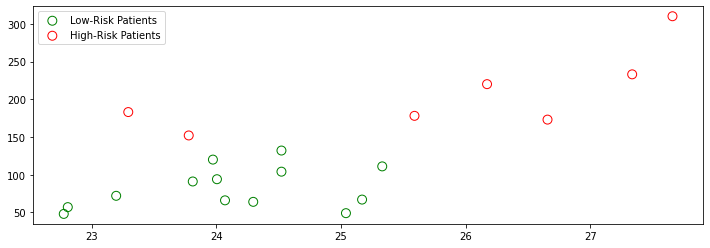

In [13]:
# Discretize the targets
diabetes_y_train_discr = np.digitize(diabetes_y_train, bins=[150])

# Visualize it
plt.scatter(diabetes_X_train[diabetes_y_train_discr==0], diabetes_y_train[diabetes_y_train_discr==0], marker='o', s=80, facecolors='none', edgecolors='g')
plt.scatter(diabetes_X_train[diabetes_y_train_discr==1], diabetes_y_train[diabetes_y_train_discr==1], marker='o', s=80, facecolors='none', edgecolors='r')
plt.legend(['Low-Risk Patients', 'High-Risk Patients'])

Here, red points have a high score and green points have a low score. Let's try to generate predictions for this dataset.

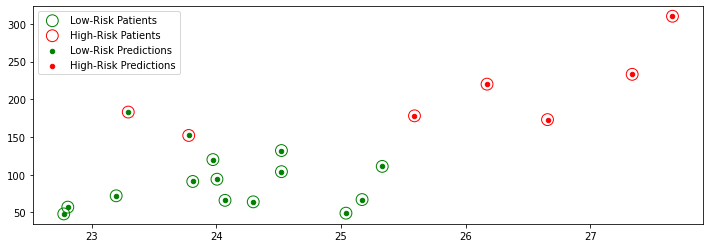

In [16]:
# Create logistic regression object (note: this is actually a classification algorithm!)
clf = linear_model.LogisticRegression()

# Train the model using the training sets
clf.fit(diabetes_X_train, diabetes_y_train_discr)

# Make predictions on the training set
diabetes_y_train_pred = clf.predict(diabetes_X_train)

# Visualize it
plt.scatter(diabetes_X_train[diabetes_y_train_discr==0], diabetes_y_train[diabetes_y_train_discr==0], marker='o', s=140, facecolors='none', edgecolors='g')
plt.scatter(diabetes_X_train[diabetes_y_train_discr==1], diabetes_y_train[diabetes_y_train_discr==1], marker='o', s=140, facecolors='none', edgecolors='r')
plt.scatter(diabetes_X_train[diabetes_y_train_pred==0], diabetes_y_train[diabetes_y_train_pred==0], color='g', s=20)
plt.scatter(diabetes_X_train[diabetes_y_train_pred==1], diabetes_y_train[diabetes_y_train_pred==1], color='r', s=20)
plt.legend(['Low-Risk Patients', 'High-Risk Patients', 'Low-Risk Predictions', 'High-Risk Predictions'])

The dots inside each circle indicate the predicitons we have made. We correctly predict on each patient.

## 2.2.5. The Feature Matrix

Machine learning algorithms are most easily defined in the language of linear algebra. Therefore, it will be useful to represent the entire dataset as one matrix $X \in \mathbb{R}^{n \times d}$, of the form:
$$ X = \begin{bmatrix}
x^{(1)}_1 & x^{(2)}_1 & \ldots & x^{(n)}_1 \\
x^{(1)}_2 & x^{(2)}_2 & \ldots & x^{(n)}_2 \\
\vdots \\
x^{(1)}_d & x^{(2)}_d & \ldots & x^{(n)}_d
\end{bmatrix}.$$

Similarly, we can vectorize the target variables into a vector $y \in \mathbb{R}^n$ of the form
$$ y = \begin{bmatrix}
x^{(1)} \\
x^{(2)} \\
\vdots \\
x^{(n)}
\end{bmatrix}.$$

# 2.3. Anatomy of a Supervised Learning Problem: The Learning Algorithm

Let's now turn our attention to the second key element of supervised learning---the learning algorithm.

### Recall: Three Components of a Supervised Machine Learning Problem

To apply supervised learning, we define a dataset and a learning algorithm.

$$ \text{Dataset} + \text{Learning Algorithm} \to \text{Predictive Model} $$

The output is a predictive model that maps inputs to targets. For instance, it can predict targets on new inputs.

## 2.3.1. Three Components of a Supervised Machine Learning Algorithm

We can also define the high-level structure of a supervised learning algorithm as consisting of three components:
* A __model class__: the set of possible models we consider.
* An __objective__ function, which defines how good a model is.
* An __optimizer__, which finds the best predictive model in the model class according to the objective function

Let's look again at our diabetes dataset for an example.

In [17]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

# Load the diabetes dataset
diabetes = datasets.load_diabetes(as_frame=True)
diabetes_X, diabetes_y = diabetes.data, diabetes.target

# Print part of the dataset
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


## 2.3.2. The Model Class

#### Defining a Model

We'll say that a model is a function
$$ f : \mathcal{X} \to \mathcal{Y} $$
that maps inputs $x \in \mathcal{X}$ to targets $y \in \mathcal{Y}$.

Often, models have *parameters* $\theta \in \Theta$ living in a set $\Theta$. We will then write the model as
$$ f_\theta : \mathcal{X} \to \mathcal{Y} $$
to denote that it's parametrized by $\theta$.

#### Defining a Model Class

Formally, the model class is a set 
$$\mathcal{M} \subseteq \{f \mid f : \mathcal{X} \to \mathcal{Y} \}$$
of possible models that map input features to targets.

When the models $f_\theta$ are paremetrized by *parameters* $\theta \in \Theta$ living in some set $\Theta$. Thus we can also write
$$\mathcal{M} = \{f_\theta \mid \theta \in \Theta \}.$$

#### An Example

One simple approach is to assume that $x$ and $y$ are related by a linear model of the form
\begin{align*}
y & = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + ... + \theta_d \cdot x_d
\end{align*}
where $x$ is a featurized input and $y$ is the target.

The $\theta_j$ are the *parameters* of the model, $\Theta = \mathbb{R}^{d+1}$, and $\mathcal{M} = \{ \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + ... + \theta_d \cdot x_d \mid \theta \in \mathbb{R}^{d+1} \}$
<!-- By using the notation $x_0 = 1$, we can represent the model in a vectorized form
$$ y = \sum_{j=0}^d \beta_j \cdot x_j = \vec \beta \cdot \vec x. $$
where $\vec x$ is a vector of features. -->

## 2.3.3. The Objective 

Given a training set, how do we pick the parameters $\theta$ for the model? A natural approach is to select $\theta$ such that $f_\theta(x^{(i)})$ is close to $y^{(i)}$ on a training dataset $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$

####  Notation

To capture this intuition, we define an *objective function* (also called a *loss function*)
$$J(f) : \mathcal{M} \to [0, \infty), $$
which describes the extent to which $f$ "fits" the data $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$.

When $f$ is parametrized by $\theta \in \Theta$, the objective becomes a function $J(\theta) : \Theta \to [0, \infty).$

#### Examples

What would are some possible objective functions? We will see many, but here are a few examples:
* Mean squared error: $$J(\theta) = \frac{1}{2n} \sum_{i=1}^n \left( f_\theta(x^{(i)}) - y^{(i)} \right)^2$$
* Absolute (L1) error: $$J(\theta) = \frac{1}{n} \sum_{i=1}^n \left| f_\theta(x^{(i)}) - y^{(i)} \right|$$

These are defined for a dataset $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$.

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y1 = np.array([1, 2, 3, 4])
y2 = np.array([-1, 1, 3, 5])

print('Mean squared error: %.2f' % mean_squared_error(y1, y2))
print('Mean absolute error: %.2f' % mean_absolute_error(y1, y2))

Mean squared error: 1.50
Mean absolute error: 1.00


## 2.3.4. The Optimizer

Given our assumption that $x,y$ follow the a linear relationship, the goal of a supervised learning algorithm is to find a good set of parameters consistent with the data.

#### Notation

At a high-level an optimizer takes an objective $J$ and a model class $\mathcal{M}$ and finds a model $f \in \mathcal{M}$ with the smallest value of the objective $J$.

\begin{align*}
\min_{f \in \mathcal{M}} J(f)
\end{align*}

Intuitively, this is the function that bests "fits" the data on the training dataset.

When $f$ is parametrized by $\theta \in \Theta$, the optimizer minimizes a function $J(\theta)$ over all $\theta \in \Theta$.

#### An Example

We will see that behind the scenes, the `sklearn.linear_models.LinearRegression` algorithm optimizes the MSE loss.

\begin{align*}
\min_{\theta \in \mathbb{R}} \frac{1}{2n} \sum_{i=1}^n \left( f_\theta(x^{(i)}) - y^{(i)} \right)^2
\end{align*}

We can easily measure the quality of the fit on the training set and the test set.

Let's run the above algorithm on our diabetes dataset.

In [19]:
# Collect 20 data points for training
diabetes_X_train = diabetes_X.iloc[-20:]
diabetes_y_train = diabetes_y.iloc[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train.values)

# Make predictions on the training set
diabetes_y_train_pred = regr.predict(diabetes_X_train)

# Collect 3 data points for testing
diabetes_X_test = diabetes_X.iloc[:3]
diabetes_y_test = diabetes_y.iloc[:3]

# generate predictions on the new patients
diabetes_y_test_pred = regr.predict(diabetes_X_test)

The algorithm returns a predictive model. We can visualize its predictions below.

InvalidIndexError: (slice(None, None, None), None)

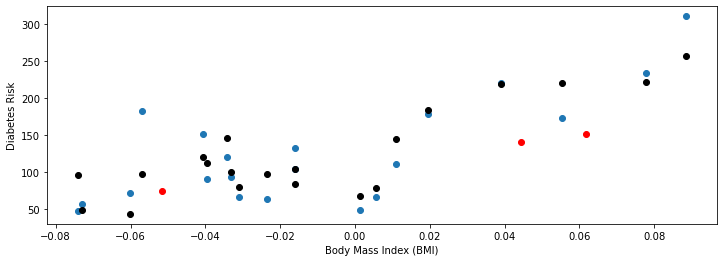

In [21]:
# visualize the results
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train.loc[:, ['bmi']], diabetes_y_train)
plt.scatter(diabetes_X_test.loc[:, ['bmi']], diabetes_y_test, color='red', marker='o')
#plt.scatter(diabetes_X_train.loc[:, ['bmi']], diabetes_y_train_pred, color='black', linewidth=1)
plt.plot(diabetes_X_test.loc[:, ['bmi']], diabetes_y_test_pred, 'x', color='red', mew=3, markersize=8)
plt.legend(['Model', 'Prediction', 'Initial patients', 'New patients'])

Again, the red dots are the true values of $y$ and the red crosses are the predicitons. Note that although the x-axis is still BMI, we used many additional features to make our predictions. As a result, the predicions are more accurate (the crosses are closer to the dots).

We can also confirm our intuition that the fit is good by evaluating the value of our objective.

In [59]:
from sklearn.metrics import mean_squared_error

print('Training set mean squared error: %.2f'
      % mean_squared_error(diabetes_y_train, diabetes_y_train_pred))
print('Test set mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_test_pred))
print('Test set mean squared error on random inputs: %.2f'
      % mean_squared_error(diabetes_y_test, np.random.randn(*diabetes_y_test_pred.shape)))

Training set mean squared error: 1118.22
Test set mean squared error: 667.81
Test set mean squared error on random inputs: 15887.97


## 2.3.5. Summary: Components of a Supervised Machine Learning Problem

In conclusion, we defined in this lecture the task of supervised learning as well as its key elements. Formally, to apply supervised learning, we define a dataset and a learning algorithm.

$$ \underbrace{\text{Dataset}}_\text{Features, Attributes, Targets} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Predictive Model} $$

A dataset consists of training examples, which are pairs of inputs and targets. Each input is a vector of features or attributes. A learning algorithm can be fully defined by a model class, objective and optimizer.

The output of a supervised learning is a predictive model that maps inputs to targets. For instance, it can predict targets on new inputs.